# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Data kurs US Dollar terhadap rupiah


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [69]:
from flask import Flask, render_template
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from bs4 import BeautifulSoup 
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [70]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [71]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [72]:
tbody = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(tbody.prettify()[1:1500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-4-2021">
     14,261.85426
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-4-2021">
     USD IDR rate for 3/4/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/3/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-3-2021">
     14,257.29443
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-3-2021">
     USD IDR rate for 3/3/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/2/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-2-2021">
     14,256.28041
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-2-2021">
     USD IDR rate for 3/2/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>

In [73]:
tr = tbody.find_all('tr')
tr[:10]

[<tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>,
 <tr><td>3/1/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-1-2021">USD IDR rate for 3/1/2021</a></td></tr>,
 <tr><td>2/26/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/2-26-2021">14,300.27815</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/R

In [74]:
td = tbody.find_all('td')
td[:10]

[<td>3/4/2021</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td>,
 <td>3/3/2021</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td>,
 <td>3/2/2021</td>,
 <td>Tuesday</td>]

In [75]:
a = tbody.find_all('a')
a[:10]

[<a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a>,
 <a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a>,
 <a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a>,
 <a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a>,
 <a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a>,
 <a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a>,
 <a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a>,
 <a href="/Rate/USD/IDR/3-1-2021">USD IDR rate for 3/1/2021</a>,
 <a href="/Rate/USD/IDR/2-26-2021">14,300.27815</a>,
 <a href="/Rate/USD/IDR/2-26-2021">USD IDR rate for 2/26/2021</a>]

Do the scrapping process here (please change this markdown with your explanation)

In [76]:
temp = [] #initiating a tuple
        
for i in range(1, len(tr)):
    
    row = tbody.find_all('tr')[i]
    if len(row) == 4:

        #get date
        date = row.find_all('td')[0].text
        date = date.strip() #for removing the excess whitespace

        #get day
        day = row.find_all('td')[1].text
        day = day.strip() #for removing the excess whitespace
   
        #get value
        idr = row.find_all('td')[2].text
        idr = idr.strip() #for removing the excess whitespace
    
        #get note
        note = row.find_all('td')[3].text
        note = note.strip() #for removing the excess whitespace
 
    temp.append((date,idr)) 
    
temp

[('3/3/2021', '14,257.29443 IDR'),
 ('3/2/2021', '14,256.28041 IDR'),
 ('3/1/2021', '14,248.60576 IDR'),
 ('2/26/2021', '14,300.27815 IDR'),
 ('2/25/2021', '14,139.73096 IDR'),
 ('2/24/2021', '14,083.03673 IDR'),
 ('2/23/2021', '14,092.64503 IDR'),
 ('2/22/2021', '14,118.07274 IDR'),
 ('2/19/2021', '14,066.79375 IDR'),
 ('2/18/2021', '14,013.51318 IDR'),
 ('2/17/2021', '14,015.16095 IDR'),
 ('2/17/2021', '14,015.16095 IDR'),
 ('2/16/2021', '13,935.96629 IDR'),
 ('2/15/2021', '13,918.18725 IDR'),
 ('2/12/2021', '13,988.54710 IDR'),
 ('2/11/2021', '13,982.27900 IDR'),
 ('2/10/2021', '13,994.09212 IDR'),
 ('2/9/2021', '13,920.52018 IDR'),
 ('2/8/2021', '14,007.25257 IDR'),
 ('2/5/2021', '14,008.99630 IDR'),
 ('2/4/2021', '14,020.87878 IDR'),
 ('2/3/2021', '13,997.60682 IDR'),
 ('2/2/2021', '14,004.60175 IDR'),
 ('2/1/2021', '14,025.27450 IDR'),
 ('1/29/2021', '14,027.32457 IDR'),
 ('1/28/2021', '14,048.06146 IDR'),
 ('1/27/2021', '14,048.72649 IDR'),
 ('1/26/2021', '14,062.91108 IDR'),
 (

In [77]:
temp = temp[::-1]
temp

[('9/6/2020', '14,754.95155 IDR'),
 ('9/7/2020', '14,743.92989 IDR'),
 ('9/8/2020', '14,839.54267 IDR'),
 ('9/9/2020', '14,783.50009 IDR'),
 ('9/10/2020', '14,871.58664 IDR'),
 ('9/11/2020', '14,865.27553 IDR'),
 ('9/13/2020', '14,876.45021 IDR'),
 ('9/14/2020', '14,864.65988 IDR'),
 ('9/15/2020', '14,843.44670 IDR'),
 ('9/16/2020', '14,807.88761 IDR'),
 ('9/17/2020', '14,829.41738 IDR'),
 ('9/18/2020', '14,730.71792 IDR'),
 ('9/20/2020', '14,728.84529 IDR'),
 ('9/21/2020', '14,701.43420 IDR'),
 ('9/22/2020', '14,751.85786 IDR'),
 ('9/23/2020', '14,825.54899 IDR'),
 ('9/24/2020', '14,888.78607 IDR'),
 ('9/25/2020', '14,855.63943 IDR'),
 ('9/27/2020', '14,859.98349 IDR'),
 ('9/28/2020', '14,892.32194 IDR'),
 ('9/29/2020', '14,880.93210 IDR'),
 ('9/30/2020', '14,867.44686 IDR'),
 ('10/1/2020', '14,822.66605 IDR'),
 ('10/2/2020', '14,852.30483 IDR'),
 ('10/5/2020', '14,797.90178 IDR'),
 ('10/6/2020', '14,857.67854 IDR'),
 ('10/7/2020', '14,705.58246 IDR'),
 ('10/8/2020', '14,692.93025 IDR

## Creating data frame & Data wrangling

Put the array into dataframe

In [78]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','idr'))

df.head()

,date,idr
0,9/6/2020,"14,754.95155 IDR"
1,9/7/2020,"14,743.92989 IDR"
2,9/8/2020,"14,839.54267 IDR"
3,9/9/2020,"14,783.50009 IDR"
4,9/10/2020,"14,871.58664 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [79]:
df['date'] = pd.to_datetime(df['date'] , dayfirst = True)
# df['date'] = df['date'].astype('datetime64', dayfirst = True )
df['idr'] = df['idr'].str.replace(" IDR","")
df['idr'] = df['idr'].str.replace(",","")
df['idr'] = df['idr'].astype('float64')

In [80]:
df['day']=df['date'].dt.day_name()
cond = (df['day'] >= '2021-02-01')
df = df[cond]
df

,date,idr,day
0,2020-06-09,14754.95155,Tuesday
1,2020-07-09,14743.92989,Thursday
2,2020-08-09,14839.54267,Sunday
3,2020-09-09,14783.50009,Wednesday
4,2020-10-09,14871.58664,Friday
...,...,...,...
129,2021-02-25,14139.73096,Thursday
130,2021-02-26,14300.27815,Friday
131,2021-01-03,14248.60576,Sunday
132,2021-02-03,14256.28041,Wednesday


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

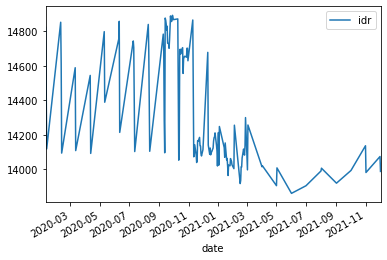

In [81]:
df.plot(x='date')


Pergerakan harga rupiah terhadap dolar terjadi lonjakan penurunan dari 2020-11, dan relatif stabil bibawah sampai peertengahan 2021-02 mulai ada pergerakan untuk naik

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

C:\Users\kikiq\anaconda3\envs\scrap-capstone\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='day'>

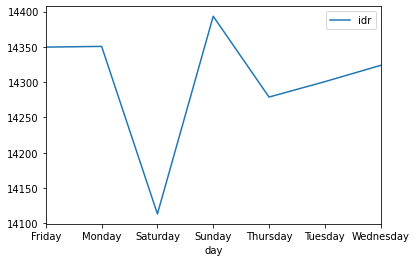

In [82]:
df.groupby('day').mean().plot()

Biasanya terjadi lonjakan harga di hari minggu

In [83]:
df['yearmonth']=df['date'].dt.to_period('M')
df.head()

,date,idr,day,yearmonth
0,2020-06-09,14754.95155,Tuesday,2020-06
1,2020-07-09,14743.92989,Thursday,2020-07
2,2020-08-09,14839.54267,Sunday,2020-08
3,2020-09-09,14783.50009,Wednesday,2020-09
4,2020-10-09,14871.58664,Friday,2020-10


<AxesSubplot:xlabel='yearmonth'>

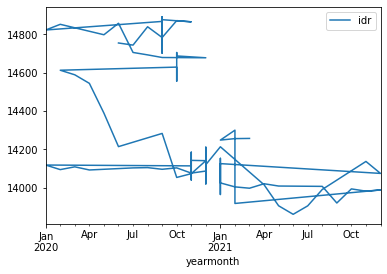

In [85]:
# yearmonth =  df.drop(columns=['date','day'])
yearmonth.plot(x='yearmonth')

penurunan harga rata2 di mulai dari bulan September dan terbesar di november, dari novemver 2020 relatif stabil ada sedikit lonjakan di february 2021 namun turun lagi di Maret 2021

<AxesSubplot:xlabel='yearmonth'>

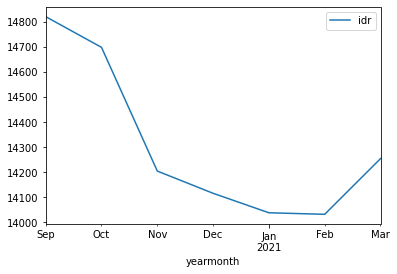

In [37]:
yearmonth.groupby('yearmonth').mean().plot()

kalau dilihat trend bulanan akan ada kenaikan lagi setelah Februari 2021